<h1>Contrail Predicition Using Scmhidt-Appleman Diagram</h1>

<h4>Step 1 : Determine the G (isobaric line) Ratio</h4>

In [1]:
# Set the temperature range
start_temperature = 210
end_temperature = 235
step = 0.2

# Initialize an empty list to store temperatures
temperatures = []

# Generate temperatures in the specified range with the given step
current_temperature = start_temperature
while current_temperature <= end_temperature:
    temperatures.append(current_temperature)
    current_temperature += step

# Print or use the resulting array as needed
print("Temperatures:", temperatures)


Temperatures: [210, 210.2, 210.39999999999998, 210.59999999999997, 210.79999999999995, 210.99999999999994, 211.19999999999993, 211.39999999999992, 211.5999999999999, 211.7999999999999, 211.9999999999999, 212.19999999999987, 212.39999999999986, 212.59999999999985, 212.79999999999984, 212.99999999999983, 213.19999999999982, 213.3999999999998, 213.5999999999998, 213.79999999999978, 213.99999999999977, 214.19999999999976, 214.39999999999975, 214.59999999999974, 214.79999999999973, 214.99999999999972, 215.1999999999997, 215.3999999999997, 215.59999999999968, 215.79999999999967, 215.99999999999966, 216.19999999999965, 216.39999999999964, 216.59999999999962, 216.7999999999996, 216.9999999999996, 217.1999999999996, 217.39999999999958, 217.59999999999957, 217.79999999999956, 217.99999999999955, 218.19999999999953, 218.39999999999952, 218.5999999999995, 218.7999999999995, 218.9999999999995, 219.19999999999948, 219.39999999999947, 219.59999999999945, 219.79999999999944, 219.99999999999943, 220.19

In [2]:
#Determine the constant
EI = 1.2232 #kgH2O/kgton
c_p = 1004 #J/kgK
eps = 0.622
Q = 43*10**6 #J/kg
eff = 0.4 #assumed in Dischl et al., 2022
p = 236*100 #Pa

#Determine the G ratio (Pa/K)
G = (EI*c_p*p)/(eps*Q*(1-eff))
G 

#Determine the pressure based on G
G_press = [G * T for T in temperatures] #Pa

# Print or use the resulting array as needed
print("G Values:", G)
print("G_press Values:", G_press)

G Values: 1.8060638400757747
G_press Values: [379.2734064159127, 379.63461918392784, 379.99583195194293, 380.3570447199581, 380.71825748797323, 381.0794702559884, 381.4406830240035, 381.8018957920186, 382.1631085600338, 382.52432132804887, 382.885534096064, 383.24674686407917, 383.6079596320943, 383.9691724001094, 384.33038516812456, 384.6915979361397, 385.0528107041548, 385.41402347216996, 385.7752362401851, 386.13644900820026, 386.49766177621535, 386.8588745442305, 387.22008731224565, 387.5813000802608, 387.9425128482759, 388.30372561629105, 388.6649383843062, 389.0261511523213, 389.38736392033644, 389.7485766883516, 390.10978945636674, 390.47100222438183, 390.832214992397, 391.19342776041213, 391.5546405284272, 391.9158532964424, 392.27706606445753, 392.6382788324727, 392.9994916004878, 393.3607043685029, 393.7219171365181, 394.0831299045332, 394.4443426725483, 394.80555544056347, 395.1667682085786, 395.5279809765937, 395.88919374460886, 396.250406512624, 396.61161928063916, 396.972

<h4>Step 2 : TLM (Tangengt Line between G lines and saturation pressure for water(</h4>

In [3]:
import math

#Determine the TLM
T_LM = 226.69+(9.43*math.log(G-0.053))+(0.720*((math.log(G-0.053))**2)) #Kelvin
T_LM

232.21056626186893

<h4>Step 3 : Saturation presure for water and ice</h4>

     Temperature [K]  Saturation Pressure for Water [hPa]  \
0              210.0                             0.013575   
1              210.2                             0.013936   
2              210.4                             0.014307   
3              210.6                             0.014686   
4              210.8                             0.015075   
..               ...                                  ...   
121            234.2                             0.224739   
122            234.4                             0.229383   
123            234.6                             0.234114   
124            234.8                             0.238933   
125            235.0                             0.243841   

     Saturation Pressure for Ice [hPa]  
0                             0.007013  
1                             0.007211  
2                             0.007414  
3                             0.007623  
4                             0.007837  
..                   

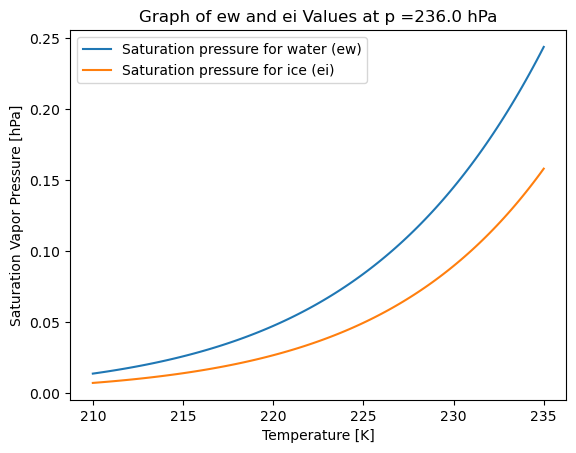

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Constants for Goff-Gratsch eq.
p_st = 101325/100 #Pa to hPa
p_ic = 611.73/100 #Pa to hPa
T_st = 372.15 #K
T_0 = 273.16 #K

# Initialize an empty list to store temperatures and corresponding ew and ei values
temperatures = []
ew_values = []
ei_values = []

# Generate temperatures in the specified range with the given step
current_temperature = start_temperature
while current_temperature <= end_temperature:
    temperatures.append(current_temperature)

    # Calculate ew using the Goff-Gratsch eq.
    ew = p_st * 10 ** (-7.90298 * (T_st / current_temperature - 1) + 5.02808 * np.log10(T_st / current_temperature) - 1.3816e-7 * (10**(11.344 * (1 - current_temperature / T_st))-1) + 8.1328e-3 * (10 ** (-3.49149 * (T_st / current_temperature-1))-1))
    ew_values.append(ew)

    # Calculate ei using the Goff-Gratsch eq.
    ei = p_ic * 10 ** (-9.09718 *(T_0/current_temperature-1) - 3.56654 * np.log10(T_0/current_temperature) + 0.876793*(1-(current_temperature/T_0)))
    ei_values.append(ei)

    current_temperature += step

# Create a DataFrame
df = pd.DataFrame({
    'Temperature [K]': temperatures,
    'Saturation Pressure for Water [hPa]': ew_values,
    'Saturation Pressure for Ice [hPa]': ei_values
})

# Display the DataFrame
print(df)

# Plotting
plt.plot(temperatures, ew_values, label='Saturation pressure for water (ew)')
plt.plot(temperatures, ei_values, label='Saturation pressure for ice (ei)')
plt.xlabel('Temperature [K]')
plt.ylabel('Saturation Vapor Pressure [hPa]')
plt.legend()
plt.title(f'Graph of ew and ei Values at p ={p/100} hPa')
plt.show()

<h4>Step 4 : Determine the TLM point on Graph</h4>

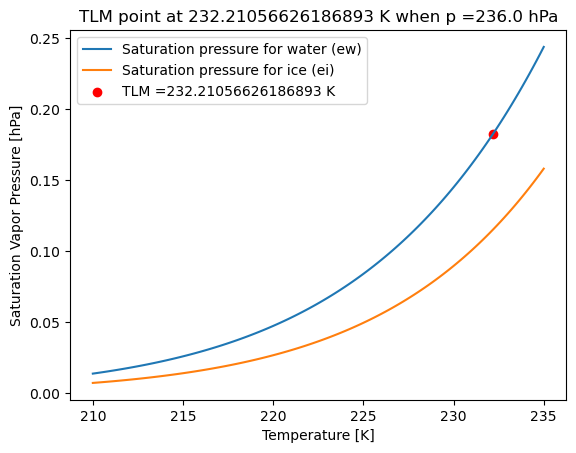

In [5]:
# Find the nearest temperature to TLM
target_temperature = T_LM
index = min(range(len(temperatures)), key=lambda i: abs(temperatures[i] - target_temperature))
nearest_temperature = temperatures[index]

# Find the corresponding saturated pressure
saturated_pressure_at_target_temperature = ew_values[index]

# Plotting
plt.plot(temperatures, ew_values, label='Saturation pressure for water (ew)')
plt.plot(temperatures, ei_values, label='Saturation pressure for ice (ei)')
plt.scatter([nearest_temperature], [saturated_pressure_at_target_temperature], color='red', label=f'TLM ={target_temperature} K')
plt.xlabel('Temperature [K]')
plt.ylabel('Saturation Vapor Pressure [hPa]')
plt.legend()
plt.title(f'TLM point at {T_LM} K when p ={p/100} hPa')
plt.show()


<h4>Step 5 : Generate the Isobaric Mixing Line on the Graph</h4>

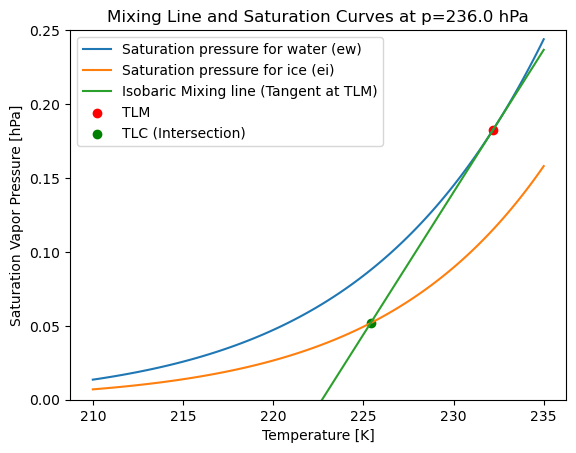

In [6]:
# Calculate the slope of the tangent line at the TLM point
#delta_T = 0.01  # small change in temperature for slope calculation
index = temperatures.index(nearest_temperature)
slope = (ew_values[index + 1] - ew_values[index]) / (temperatures[index + 1] - temperatures[index])

# Determine the intercept of the tangent line
intercept = ew_values[index] - slope * temperatures[index]

# Generate temperatures for the mixing line
mixing_line_temps = np.linspace(start_temperature, end_temperature, 100)
mixing_line_ew_values = slope * mixing_line_temps + intercept

# Find the intersection of the mixing line and saturation curve for ice
def find_intersection(temperatures, ew_values, mixing_line_slope, mixing_line_intercept):
    for i in range(len(temperatures) - 1):
        if (ew_values[i] - (mixing_line_slope * temperatures[i] + mixing_line_intercept)) * (
                ew_values[i + 1] - (mixing_line_slope * temperatures[i + 1] + mixing_line_intercept)) <= 0:
            x1, y1 = temperatures[i], ew_values[i]
            x2, y2 = temperatures[i + 1], ew_values[i + 1]
            return x1, y1, x2, y2
    return None

# Find the intersection point
intersection_point = find_intersection(temperatures, ei_values, slope, intercept)

# Plotting the mixing line and saturation curves with limited y-axis range
plt.plot(temperatures, ew_values, label='Saturation pressure for water (ew)')
plt.plot(temperatures, ei_values, label='Saturation pressure for ice (ei)')
plt.plot(mixing_line_temps, mixing_line_ew_values, label='Isobaric Mixing line (Tangent at TLM)')

# Find the index where saturation vapor pressure is close to 0
#zero_index = np.argmax(mixing_line_ew_values <= 0.3)

# Plot the mixing line 
plt.scatter([nearest_temperature], [saturated_pressure_at_target_temperature], color='red',
            label='TLM')
if intersection_point:
    plt.scatter(intersection_point[0], intersection_point[1], color='green', label='TLC (Intersection)')

plt.xlabel('Temperature [K]')
plt.ylabel('Saturation Vapor Pressure [hPa]')
plt.legend()
plt.title(f'Mixing Line and Saturation Curves at p={p/100} hPa')
plt.ylim(0, 0.25)  # Set y-axis range
plt.show()


<h4>Step 6 : T_LC to create the Schmidt-Appleman Diagram (on progress)</h4>

In [7]:
#The Lowest Critical Temperature
# Find the intersection point
intersection_point = find_intersection(temperatures, ei_values, slope, intercept)

# Display the TLC (Triple Line Crossing) values
if intersection_point:
    tlc_temperature, tlc_pressure = intersection_point[0], intersection_point[1]
    print(f"TLC Temperature: {tlc_temperature} K")
    print(f"TLC Saturation Pressure : {tlc_pressure} hPa")
else:
    print("No intersection found. TLC not determined.")

TLC Temperature: 225.39999999999912 K
TLC Saturation Pressure : 0.05183039161990395 hPa


<h4>Step 7 : Find the pressure on various altitude following ISA formula</h4>

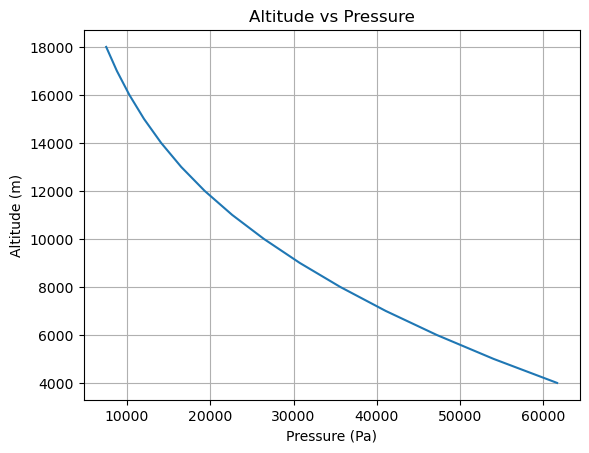

In [8]:
# Given constants
p_0 = 101325  # Pa (sea level)
T_0 = 288.15  # K (temp at sea level)
beta = -0.0065  # K/m (vertical temp gradient)
g_0 = 9.80665  # m/s^2 (gravity acc)
R = 287.05287  # J/K.kg (specific gas constant)
T_high = 216.65  # K (constant temp, [ICAO,1993])

# Generate array of altitudes from 4000 m to 18000 m with a step of 100 m
altitudes = np.arange(4000, 18001, 1000)

# Calculate pressures based on altitude
pressures = []
for h in altitudes:
    if h <= 11000:
        p_low = p_0 * ((1 + (beta * h) / T_0) ** (-g_0 / (beta * R)))
        pressures.append(p_low)
    else:
        p_11 = p_0 * ((1 + (beta * 11000) / T_0) ** (-g_0 / (beta * R)))
        p_high = p_11 * np.exp(-(g_0 / (R * T_high)) * (h - 11000))
        pressures.append(p_high)

# Plotting
plt.plot(pressures, altitudes)
plt.ylabel('Altitude (m)')
plt.xlabel('Pressure (Pa)')
plt.title('Altitude vs Pressure')
plt.grid(True)
plt.show()


<h4>Step 8 : Vary the altitude, so we can get the various TLC</h4>

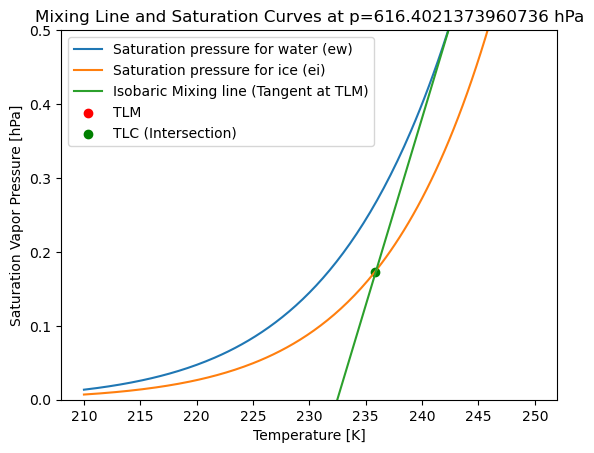

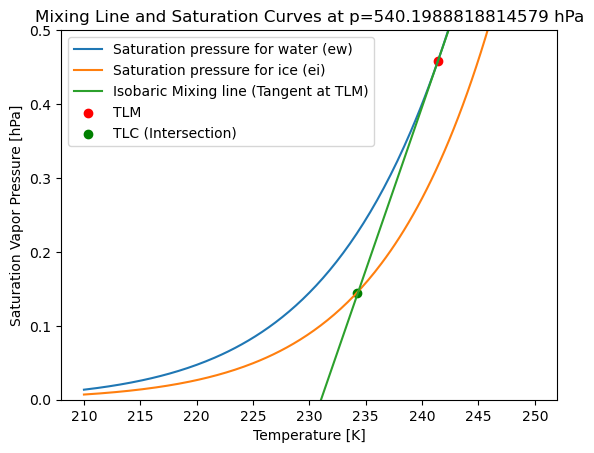

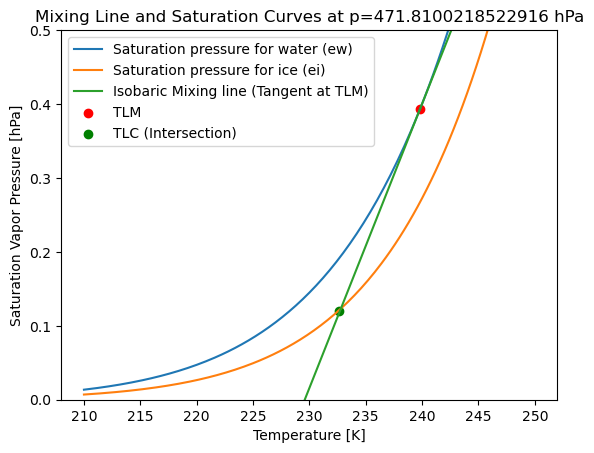

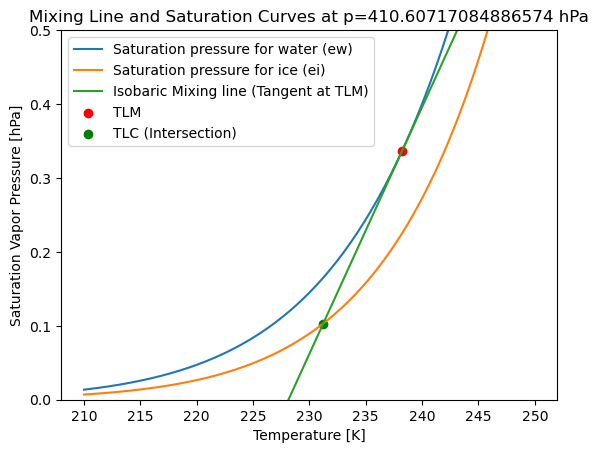

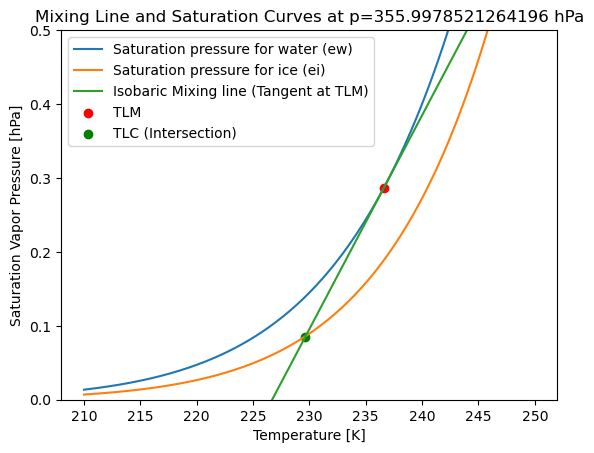

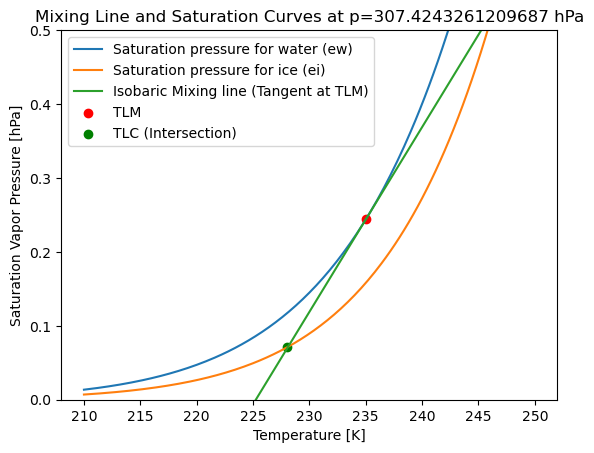

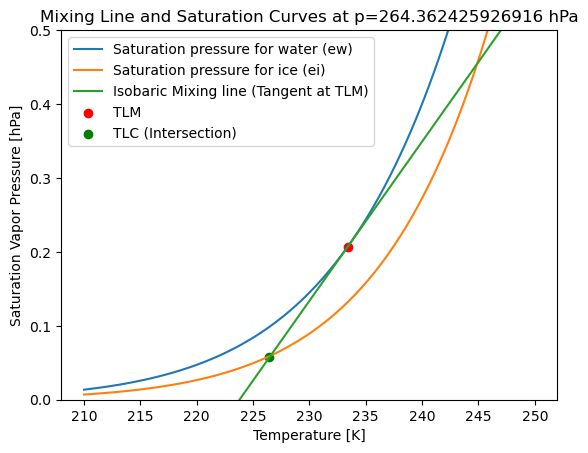

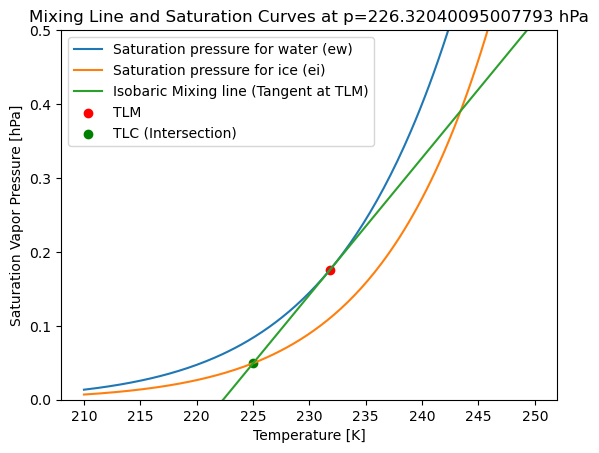

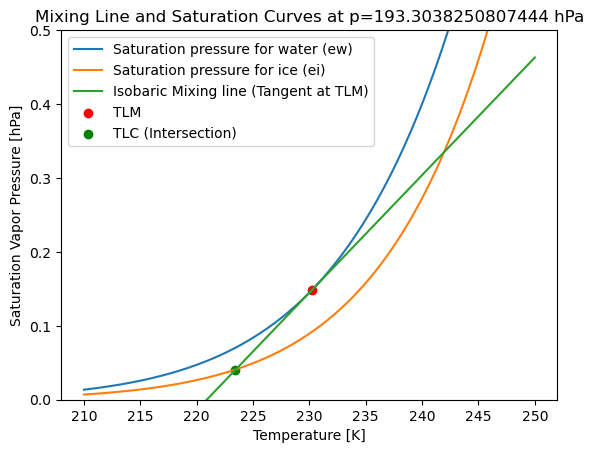

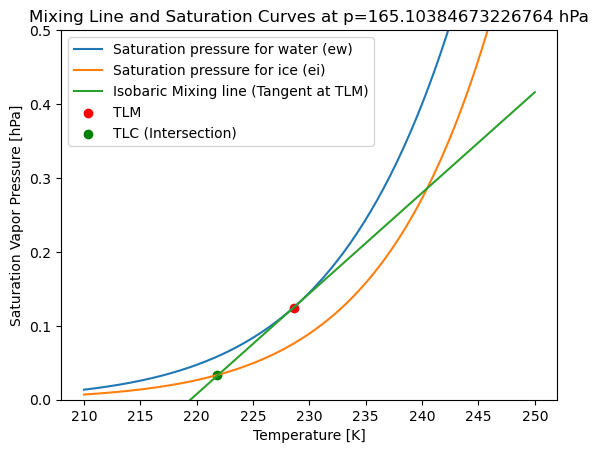

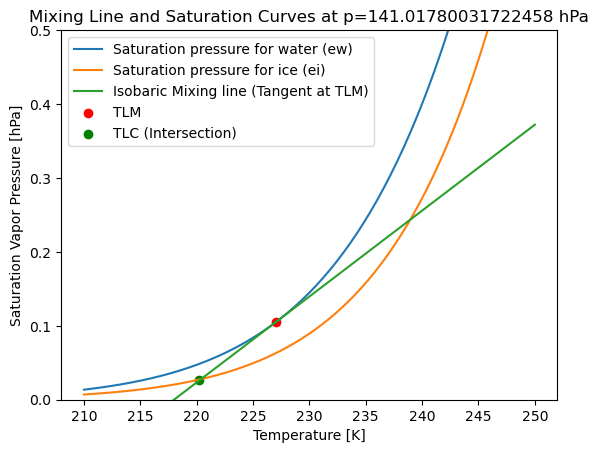

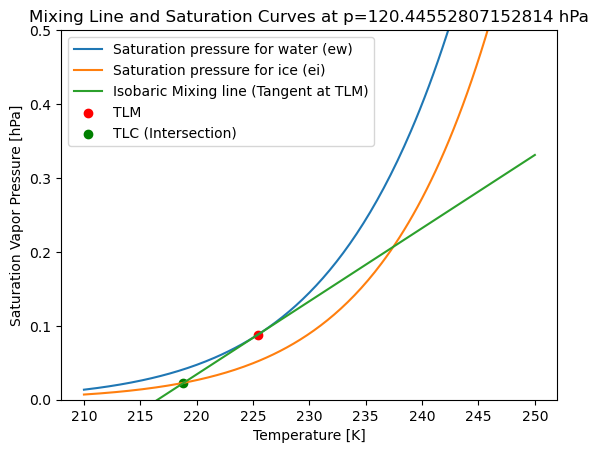

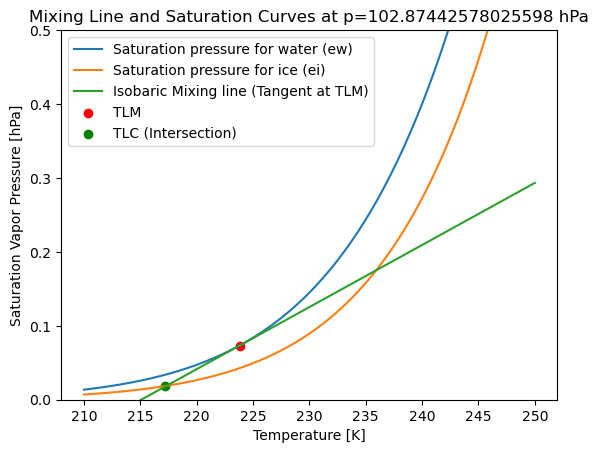

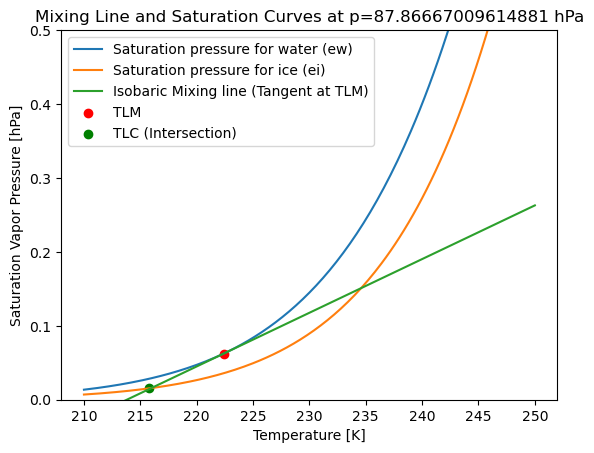

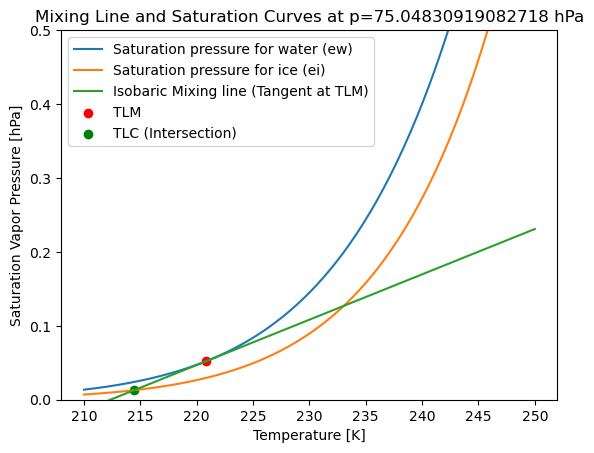

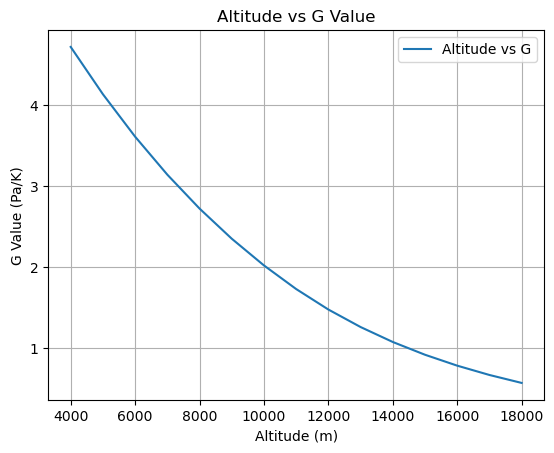

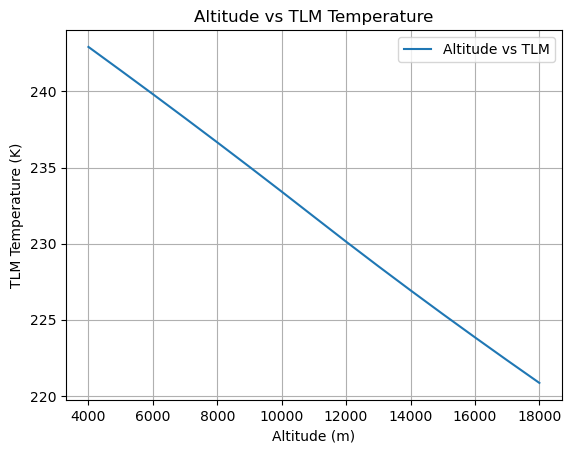

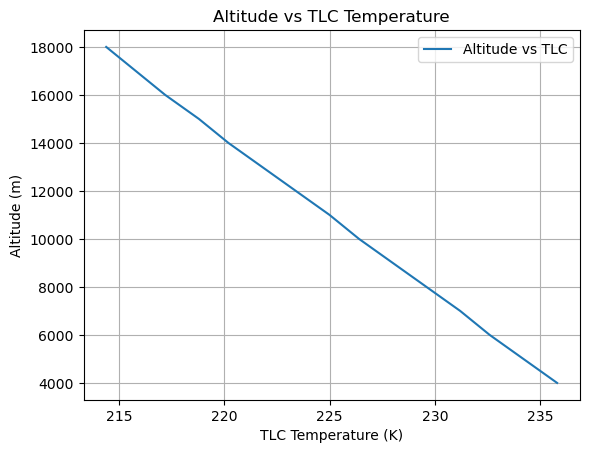

In [9]:
# Set the temperature range
start_temperature = 210
end_temperature = 250
step = 0.2

#Constants for Goff-Gratsch eq.
p_st = 101325/100 #Pa to hPa
p_ic = 611.73/100 #Pa to hPa
T_st = 372.15 #K
T_0 = 273.16 #K

# Initialize an empty list to store temperatures and corresponding ew and ei values
temperatures = []
ew_values = []
ei_values = []

# Generate temperatures in the specified range with the given step
current_temperature = start_temperature
while current_temperature <= end_temperature:
    temperatures.append(current_temperature)

    # Calculate ew using the Goff-Gratsch eq.
    ew = p_st * 10 ** (-7.90298 * (T_st / current_temperature - 1) + 5.02808 * np.log10(T_st / current_temperature) - 1.3816e-7 * (10**(11.344 * (1 - current_temperature / T_st))-1) + 8.1328e-3 * (10 ** (-3.49149 * (T_st / current_temperature-1))-1))
    ew_values.append(ew)

    # Calculate ei using the Goff-Gratsch eq.
    ei = p_ic * 10 ** (-9.09718 *(T_0/current_temperature-1) - 3.56654 * np.log10(T_0/current_temperature) + 0.876793*(1-(current_temperature/T_0)))
    ei_values.append(ei)

    current_temperature += step


#Determine the constant
EI = 1.2232  # kgH2O/kgton
c_p = 1004  # J/kgK
eps = 0.622
Q = 43 * 10**6  # J/kg
eff = 0.4  # assumed in Dischl et al., 2022
p_0 = 236 * 100  # Pa

# Generate pressures based on altitude
p_low_values = [p_0 * ((1 + (beta * h) / T_0) ** (-g_0 / (beta * R))) for h in altitudes]
p_high_values = [p_0 * ((1 + (beta * 11000) / T_0) ** (-g_0 / (beta * R))) * np.exp(-(g_0 / (R * T_high)) * (h - 11000)) for h in altitudes]

# Initialize empty lists to store G, TLM, and TLC values
G_values = []
TLM_values = []
TLC_values = []

# Loop over pressures and calculate G, TLM, and TLC for each
for p in pressures:
    # Determine the G ratio (Pa/K) based on the given pressure
    G = (EI * c_p * p) / (eps * Q * (1 - eff))
    G_values.append(G)

    # Determine the TLM based on G
    T_LM = 226.69 + (9.43 * math.log(G - 0.053)) + (0.720 * ((math.log(G - 0.053))**2))
    TLM_values.append(T_LM)


    # Find the nearest temperature to TLM
    target_temperature = T_LM
    index = min(range(len(temperatures)), key=lambda i: abs(temperatures[i] - target_temperature))
    nearest_temperature = temperatures[index]

    # Find the corresponding saturated pressure
    saturated_pressure_at_target_temperature = ew_values[index]

    # Calculate the slope of the tangent line at the TLM point
    slope = (ew_values[index + 1] - ew_values[index]) / (temperatures[index + 1] - temperatures[index])

    # Determine the intercept of the tangent line
    intercept = ew_values[index] - slope * temperatures[index]

    # Generate temperatures for the mixing line
    mixing_line_temps = np.linspace(start_temperature, end_temperature, 100)
    mixing_line_ew_values = slope * mixing_line_temps + intercept

    # Find the intersection of the mixing line and saturation curve for ice
    intersection_point = find_intersection(temperatures, ei_values, slope, intercept)

    # Plotting the mixing line and saturation curves with limited y-axis range
    plt.plot(temperatures, ew_values, label='Saturation pressure for water (ew)')
    plt.plot(temperatures, ei_values, label='Saturation pressure for ice (ei)')
    plt.plot(mixing_line_temps, mixing_line_ew_values, label='Isobaric Mixing line (Tangent at TLM)')

    # Plot the mixing line
    plt.scatter([nearest_temperature], [saturated_pressure_at_target_temperature], color='red', label='TLM')
    if intersection_point:
        plt.scatter(intersection_point[0], intersection_point[1], color='green', label='TLC (Intersection)')
    
    plt.xlabel('Temperature [K]')
    plt.ylabel('Saturation Vapor Pressure [hPa]')
    plt.legend()
    plt.title(f'Mixing Line and Saturation Curves at p={p/100} hPa')
    plt.ylim(0, 0.5)  # Set y-axis range
    plt.show()

    # Store the TLC value
    if intersection_point:
        tlc_temperature, tlc_pressure = intersection_point[0], intersection_point[1]
        TLC_values.append(tlc_temperature)
    else:
        TLC_values.append(None)

# Plotting Altitude vs G
plt.plot(altitudes, G_values, label='Altitude vs G')
plt.xlabel('Altitude (m)')
plt.ylabel('G Value (Pa/K)')
plt.title('Altitude vs G Value')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Altitude vs TLM
plt.plot(altitudes, TLM_values, label='Altitude vs TLM')
plt.xlabel('Altitude (m)')
plt.ylabel('TLM Temperature (K)')
plt.title('Altitude vs TLM Temperature')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Altitude vs TLC
plt.plot(TLC_values, altitudes, label='Altitude vs TLC')
plt.ylabel('Altitude (m)')
plt.xlabel('TLC Temperature (K)')
plt.title('Altitude vs TLC Temperature')
plt.grid(True)
plt.legend()
plt.show()


<h4>Step 9 : Determine value of TLM and TLC at any point</h4>

In [10]:
# Initialize a list to store DataFrame rows
data_rows = []

# Loop over pressures and calculate G, TLM, and TLC for each
for i, p in enumerate(pressures):
    # Determine the G ratio (Pa/K) based on the given pressure
    G = (EI * c_p * p) / (eps * Q * (1 - eff))

    # Determine the TLM based on G
    T_LM = 226.69 + (9.43 * math.log(G - 0.053)) + (0.720 * ((math.log(G - 0.053))**2))

    # Find the nearest temperature to TLM
    target_temperature = T_LM
    index = min(range(len(temperatures)), key=lambda i: abs(temperatures[i] - target_temperature))
    nearest_temperature = temperatures[index]

    # Find the corresponding saturated pressure
    saturated_pressure_at_target_temperature = ew_values[index]

    # Calculate the slope of the tangent line at the TLM point
    slope = (ew_values[index + 1] - ew_values[index]) / (temperatures[index + 1] - temperatures[index])

    # Determine the intercept of the tangent line
    intercept = ew_values[index] - slope * temperatures[index]

    # Find the intersection of the mixing line and saturation curve for ice
    intersection_point = find_intersection(temperatures, ei_values, slope, intercept)

    # Store values in the data row
    data_row = {
        'Altitude (m)': altitudes[i],
        'Pressure (Pa)': p,
        'G': G,
        'TLM (K)': T_LM,
        'TLC (K)': TLC_values[i] if i < len(TLC_values) else None
    }
    data_rows.append(data_row)

# Create a DataFrame
df_result = pd.DataFrame(data_rows)

# Display the DataFrame
print(df_result)


    Altitude (m)  Pressure (Pa)         G     TLM (K)  TLC (K)
0           4000   61640.213740  4.717210  242.918803    235.8
1           5000   54019.888188  4.134041  241.375935    234.2
2           6000   47181.002185  3.610674  239.817333    232.6
3           7000   41060.717085  3.142300  238.242543    231.2
4           8000   35599.785213  2.724385  236.651048    229.6
5           9000   30742.432612  2.352661  235.042257    228.0
6          10000   26436.242593  2.023116  233.415475    226.4
7          11000   22632.040095  1.731988  231.769877    225.0
8          12000   19330.382508  1.479318  230.129345    223.4
9          13000   16510.384673  1.263509  228.517792    221.8
10         14000   14101.780032  1.079183  226.934208    220.2
11         15000   12044.552807  0.921747  225.377423    218.8
12         16000   10287.442578  0.787279  223.846075    217.2
13         17000    8786.667010  0.672427  222.338576    215.8
14         18000    7504.830919  0.574331  220.853058  

<h4>Step 10 : Iteration to determine the value of TLC in several relative humidity (U)</h4>

In [11]:
# Function to define the system of equations for finding T_LC_new
def equations(T_LC_new, T_LM, G, U, p_st, T_st):
    ew_TLM = p_st * 10 ** (-7.90298 * (T_st / T_LM - 1) + 5.02808 * np.log10(T_st / T_LM) - 1.3816e-7 * (10**(11.344 * (1 - T_LM / T_st))-1) + 8.1328e-3 * (10 ** (-3.49149 * (T_st / T_LM-1))-1))
    ew_TLC_new = p_st * 10 ** (-7.90298 * (T_st / T_LC_new - 1) + 5.02808 * np.log10(T_st / T_LC_new) - 1.3816e-7 * (10**(11.344 * (1 - T_LC_new / T_st))-1) + 8.1328e-3 * (10 ** (-3.49149 * (T_st / T_LC_new-1))-1))

    # System of equations
    eq1 = T_LM - T_LC_new - ((ew_TLM - U * ew_TLC_new) / G)

    return eq1

# Initialize a list to store DataFrame rows
data_rows = []

# Loop over pressures and calculate G, TLM, and TLC for each
for i, p in enumerate(pressures):
    # Determine the G ratio (Pa/K) based on the given pressure
    G = G_values[i]/100

    # Determine the TLM based on G
    T_LM = TLM_values[i]

    # Iterate for different values of U
    for U in np.arange(0, 1.2, 0.2):
        T_LC_new_guess = 220  # Starting guess for T_LC_new
        tol = 1e-3  # Tolerance for convergence
        max_iterations = 100000
        iter_count = 0

        # Iterative process to determine T_LC_new
        while iter_count < max_iterations:
            ew_TLM = p_st * 10 ** (-7.90298 * (T_st / T_LM - 1) + 5.02808 * np.log10(T_st / T_LM) - 1.3816e-7 * (10**(11.344 * (1 - T_LM / T_st))-1) + 8.1328e-3 * (10 ** (-3.49149 * (T_st / T_LM-1))-1))
            ew_TLC_new = p_st * 10 ** (-7.90298 * (T_st / T_LC_new_guess - 1) + 5.02808 * np.log10(T_st / T_LC_new_guess) - 1.3816e-7 * (10**(11.344 * (1 - T_LC_new_guess / T_st))-1) + 8.1328e-3 * (10 ** (-3.49149 * (T_st / T_LC_new_guess-1))-1))

            # Update T_LC_new_guess
            T_LC_new_guess = T_LM - ((ew_TLM - U * ew_TLC_new) / G)

            # Check for convergence
            if math.isclose(equations(T_LC_new_guess, T_LM, G, U, p_st, T_st), 0, abs_tol=tol):
                break

            iter_count += 1

        # Check if the iteration converged within the maximum iterations
        if iter_count == max_iterations:
            print(f"Warning: Iteration did not converge for altitude {altitudes[i]} and U {U}")

        # Store values in the data row
        data_row = {
            'Altitude (m)': altitudes[i],
            'Pressure (Pa)': p,
            'G': G,
            'TLM (K)': T_LM,
            'U': U,
            'TLC_new (K)': T_LC_new_guess
        }
        data_rows.append(data_row)

# Create a DataFrame
df_result = pd.DataFrame(data_rows)

# Display the DataFrame
print(df_result)


    Altitude (m)  Pressure (Pa)         G     TLM (K)    U  TLC_new (K)
0           4000   61640.213740  0.047172  242.918803  0.0   231.699556
1           4000   61640.213740  0.047172  242.918803  0.2   232.498645
2           4000   61640.213740  0.047172  242.918803  0.4   233.466775
3           4000   61640.213740  0.047172  242.918803  0.6   234.710788
4           4000   61640.213740  0.047172  242.918803  0.8   236.518915
..           ...            ...       ...         ...  ...          ...
85         18000    7504.830919  0.005743  220.853058  0.2   212.417212
86         18000    7504.830919  0.005743  220.853058  0.4   213.199736
87         18000    7504.830919  0.005743  220.853058  0.6   214.205046
88         18000    7504.830919  0.005743  220.853058  0.8   215.663727
89         18000    7504.830919  0.005743  220.853058  1.0   219.721479

[90 rows x 6 columns]


In [12]:
# Create a DataFrame
df_result = pd.DataFrame(data_rows)

# Pivot the DataFrame
df_pivot = df_result.pivot(index='Altitude (m)', columns='U', values='TLC_new (K)')

# Display the pivoted DataFrame
print(df_pivot)


U                    0.0         0.2         0.4         0.6         0.8  \
Altitude (m)                                                               
4000          231.699556  232.498645  233.466775  234.710788  236.518915   
5000          230.318557  231.106642  232.061359  233.288061  235.070849   
6000          228.922214  229.699256  230.640507  231.849838  233.606249   
7000          227.509760  228.275711  229.202517  230.395328  232.126267   
8000          226.080375  226.835184  227.748492  228.922767  230.629037   
9000          224.633184  225.376793  226.276540  227.433183  229.113636   
10000         223.167251  223.899594  224.785712  225.924615  227.579083   
11000         221.681574  222.402580  223.274995  224.396037  226.024329   
12000         220.197609  220.906920  221.766212  222.869528  224.471829   
13000         218.737143  219.436223  220.281265  221.366791  222.943579   
14000         217.299639  217.987673  218.820349  219.890338  221.440025   
15000       

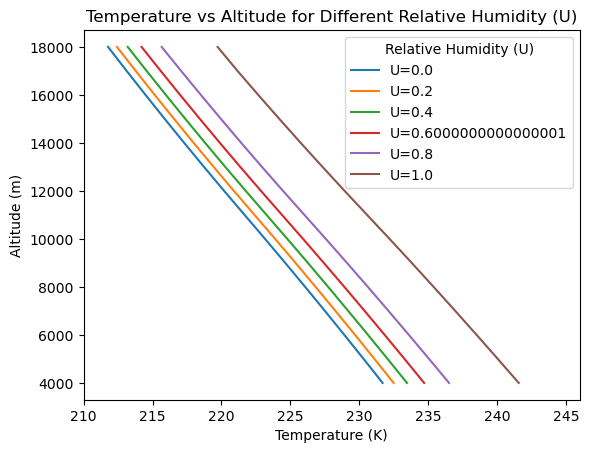

In [13]:
# Clear the figure
plt.clf()

# Plot the graph for each U value
for u_value in df_pivot.columns:
    plt.plot(df_pivot[u_value], df_pivot.index, label=f'U={u_value}')

# Add labels and legend
plt.xlabel('Temperature (K)')
plt.ylabel('Altitude (m)')
plt.legend(title='Relative Humidity (U)')
plt.xlim(210, 246)
plt.title('Temperature vs Altitude for Different Relative Humidity (U)')

# Show the plot
plt.show()
